<b>Investigate the contents of the dataset and include a brief description of its variables.</b>

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score
from streamlit import columns
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
features = pd.DataFrame(X)
targets = pd.DataFrame(y)
print(features)
print(targets)
# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

Mitä siinä on? <br>
Datassa näkyy jokaisesta havainnosta mittauksia soluesiintymien koosta ja muita kuvaavia mittauksia. <br>
Jokaisesta havainnosta on 30 mitattua arvoa, sekä ID ja Diagnoosi.

<b>Apply standardization to the numerical values of the input variables.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
print(Features_scaled)

      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0      2.652874

Above we have the standardized data. The mean is 0 and the standard diviation has 68% of the data between 1 and -1. Now we will split the data into training and testing sets.

<b>Extract part of the data for testing in accordance with the hold-out validation technique.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a testing set
# 70% of the data will be used for training, 30% for testing
Features_train, Features_test, targets_train, targets_test = train_test_split(Features_scaled, targets, test_size=0.3, random_state=126)

We have now separated the training and test data into their own datasets.

<b>Train a binary classifier for predicting the cancer diagnosis (malignant / benign). Experiment with a few choices of the hyperparameter k, and report the findings.

In [54]:
'''
Train a binary classifier for predicting the cancer diagnosis (malignant / benign).
Experiment with a few choices of the hyperparameter k, and report the findings.
'''

# Loop through different values of n_neighbors
for n in range(1, 11):
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(Features_train, targets_train.values.ravel())

    # Predict the target values
    targets_pred = knn.predict(Features_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(targets_test, targets_pred)
    print(f'Accuracy with n_neighbors={n}: {round(accuracy, 3)}')

Accuracy with n_neighbors=1: 0.953
Accuracy with n_neighbors=2: 0.93
Accuracy with n_neighbors=3: 0.959
Accuracy with n_neighbors=4: 0.936
Accuracy with n_neighbors=5: 0.953
Accuracy with n_neighbors=6: 0.947
Accuracy with n_neighbors=7: 0.953
Accuracy with n_neighbors=8: 0.953
Accuracy with n_neighbors=9: 0.953
Accuracy with n_neighbors=10: 0.947


It looks like having 3 neigbours gives us best accuracy, so let's use that for the remainder of this assignment.

<b>Test the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).<b>

In [55]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Features_train, targets_train)
y_pred = model.predict(Features_test)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


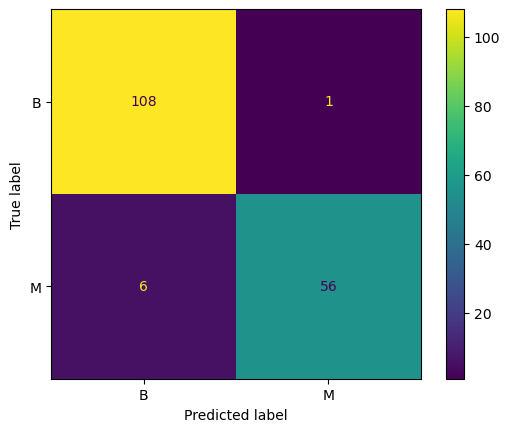

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(targets_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B', 'M'])

# plot confusion matrix
cmd.plot()
plt.show()

The matrix looks pretty good. The model predicted 114 Benigns and 57 Maligns, with erronious predictions of 6 and 1 respectively.

In [58]:
# Next we calculate the accuracy, precision, and recall of the classifier.
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(targets_test, y_pred)
precision = precision_score(targets_test, y_pred, pos_label='M')
recall = recall_score(targets_test, y_pred, pos_label='M')

print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'Recall: {round(recall, 3)}')

Accuracy: 0.959
Precision: 0.982
Recall: 0.903


```markdown
### Summary of Test Results

The performance of the K-Nearest Neighbors (KNN) classifier was evaluated using accuracy, precision, and recall metrics. The results are as follows:

- **Accuracy**: 0.959
- **Precision**: 0.982
- **Recall**: 0.903

These metrics indicate that the classifier performs well in distinguishing between malignant and benign cases, with high precision and recall values.
```